In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

%matplotlib inline

base_img_path = "../../report/assets/images/case-study-02/"

In [2]:
threads = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

def read_data(test_name: str) -> pd.DataFrame:
    results_files = [f"../jmeter/results-{test_name}-1000-{i}-1.jtl" for i in threads]
    li = []
    for i, filename in enumerate(results_files):
        df_new = pd.read_csv(filename, index_col=None, header=0)
        df_new["Threads"] = threads[i]
        li.append(df_new)

    return pd.concat(li, axis=0, ignore_index=True)

### Load Test A: GET /api/movie/list and GET /api/movie/list/{correlationId}

In [3]:
dfa = read_data("a")
dfa

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650653465040,60,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,60.0,0.0,16.0,10
1,1650653465110,14,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/0a4edd53-...,14.0,0.0,0.0,10
2,1650653465099,31,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,31.0,0.0,1.0,10
3,1650653465124,8,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,8.0,0.0,0.0,10
4,1650653465131,19,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/19ed5259-...,19.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052382,1650653861359,8,GET Request,200,NaN,Thread Group (Users) 1-88,text,True,NaN,198,130,4,4,http://localhost:8099/api/movie/list,8.0,0.0,0.0,100
1052383,1650653861360,8,GET Request,200,NaN,Thread Group (Users) 1-94,text,True,NaN,1197,167,4,4,http://localhost:8099/api/movie/list/3ae670e1-...,8.0,0.0,0.0,100
1052384,1650653861362,9,GET Request,200,NaN,Thread Group (Users) 1-96,text,True,NaN,1197,167,3,3,http://localhost:8099/api/movie/list/663f130b-...,9.0,0.0,0.0,100
1052385,1650653861364,9,GET Request,200,NaN,Thread Group (Users) 1-95,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/be5fd09b-...,8.0,0.0,0.0,100


In [4]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052387 entries, 0 to 1052386
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timeStamp        1052387 non-null  int64  
 1   elapsed          1052387 non-null  int64  
 2   label            1052387 non-null  object 
 3   responseCode     1052387 non-null  int64  
 4   responseMessage  0 non-null        float64
 5   threadName       1052387 non-null  object 
 6   dataType         1052387 non-null  object 
 7   success          1052387 non-null  bool   
 8   failureMessage   0 non-null        float64
 9   bytes            1052387 non-null  int64  
 10  sentBytes        1052387 non-null  int64  
 11  grpThreads       1052387 non-null  int64  
 12  allThreads       1052387 non-null  int64  
 13  URL              1052387 non-null  object 
 14  Latency          1052386 non-null  float64
 15  IdleTime         1052386 non-null  float64
 16  Connect          1

In [5]:
dfa = dfa.sort_values(by="timeStamp")
dfa["timeStamp"] = dfa["timeStamp"].diff().cumsum() / 1e3
dfa

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,NaN,60,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,60.0,0.0,16.0,10
2,0.059,31,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,31.0,0.0,1.0,10
1,0.070,14,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/0a4edd53-...,14.0,0.0,0.0,10
3,0.084,8,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,198,130,2,2,http://localhost:8099/api/movie/list,8.0,0.0,0.0,10
4,0.091,19,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/19ed5259-...,19.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852382,1398.952,9,GET Request,200,NaN,Thread Group (Users) 1-59,text,True,NaN,1197,167,3,3,http://localhost:8099/api/movie/list/c1bc9a7f-...,9.0,0.0,0.0,90
852383,1398.953,10,GET Request,200,NaN,Thread Group (Users) 1-86,text,True,NaN,1197,167,3,3,http://localhost:8099/api/movie/list/274581ca-...,10.0,0.0,0.0,90
852384,1398.958,9,GET Request,200,NaN,Thread Group (Users) 1-84,text,True,NaN,1197,167,2,2,http://localhost:8099/api/movie/list/66a55076-...,8.0,0.0,0.0,90
852385,1398.961,8,GET Request,200,NaN,Thread Group (Users) 1-59,text,True,NaN,198,130,1,1,http://localhost:8099/api/movie/list,8.0,0.0,0.0,90


In [6]:
dfa_by_threads = dfa.groupby("Threads").mean()
dfa_by_threads

,timeStamp,elapsed,responseCode,responseMessage,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,,
10,10.795138,10.372350,204.530000,NaN,0.984900,NaN,677.613600,148.500000,9.823250,9.823250,10.289300,0.0,0.006300
20,108.297407,15.564225,205.527500,NaN,0.981575,NaN,671.360450,148.500000,19.654325,19.654325,15.501500,0.0,0.005725
30,220.880804,23.565567,205.855000,NaN,0.980483,NaN,669.900050,148.500000,29.642300,29.642300,23.501467,0.0,0.006967
40,628.325761,28.696051,208.827616,NaN,0.970575,NaN,658.908482,148.482292,39.496928,39.496928,28.638331,0.0,0.011023
50,787.547452,34.660980,209.291000,NaN,0.969030,NaN,657.878290,148.500000,49.364720,49.364720,34.613660,0.0,0.009460
60,884.321482,43.204950,204.430000,NaN,0.985233,NaN,674.758617,148.500000,59.513717,59.513717,43.152933,0.0,0.005733
70,1050.383828,46.893300,203.132857,NaN,0.989557,NaN,679.119443,148.500000,69.490093,69.490093,46.848093,0.0,0.004793
80,1200.280498,52.497400,205.919375,NaN,0.980269,NaN,671.880369,148.500000,79.407675,79.407675,52.458494,0.0,0.007756
90,1338.211022,58.728711,208.998333,NaN,0.970006,NaN,655.063844,148.500000,89.279522,89.279522,58.691661,0.0,0.010383


In [7]:
pd.set_option('display.float_format', '{:.0%}'.format)
dfa.groupby("Threads")["responseCode"].value_counts(normalize=True)

Threads  responseCode
10       200            98%
         500             2%
20       200            98%
         500             2%
30       200            98%
         500             2%
40       200            97%
         500             3%
50       200            97%
         500             3%
60       200            99%
         500             1%
70       200            99%
         500             1%
80       200            98%
         500             2%
90       200            97%
         500             3%
100      200            99%
         500             1%
Name: responseCode, dtype: float64

In [8]:
pd.reset_option('display.float_format')

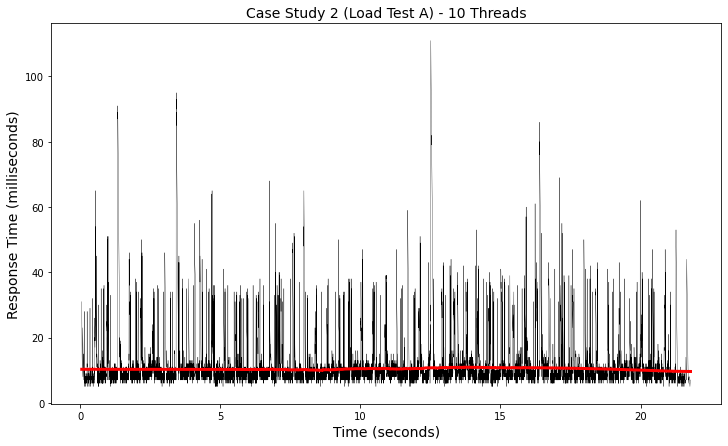

In [9]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 10
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 2 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs02-lta-1.png", bbox_inches="tight", dpi=120)
plt.show()

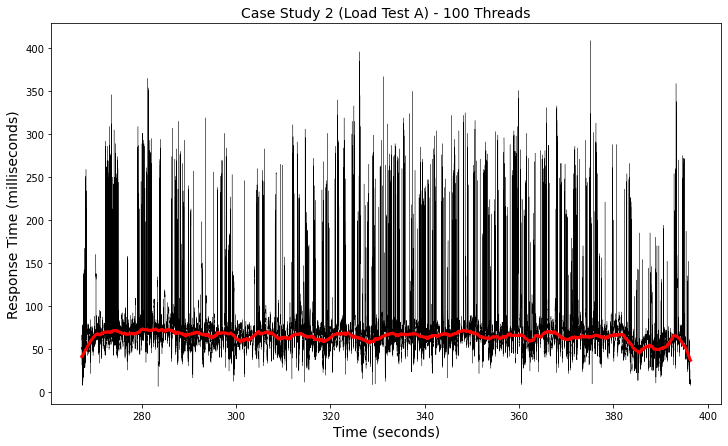

In [10]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 100
x = dfa[dfa["Threads"] == t]["timeStamp"]
y = dfa[dfa["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 2 (Load Test A) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs02-lta-2.png", bbox_inches="tight", dpi=120)
plt.show()

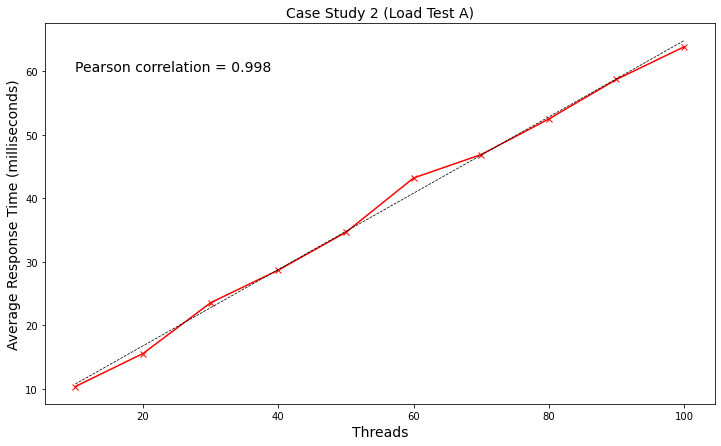

In [11]:
plt.figure(figsize=(12, 7), facecolor="white")
x = dfa_by_threads.index
y = dfa_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 2 (Load Test A)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (milliseconds)", fontsize=14)

# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="black", ls="--", lw=0.75)
plt.text(10, 60, f"Pearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}", fontsize=14)
plt.savefig(f"{base_img_path}cs02-lta-4.png", bbox_inches="tight", dpi=120)

plt.show()

### Load Test B: POST /api/cinema/cineworld/reservation/make and GET /api/cinema/cineworld/reservation/make/{correlationId}

In [12]:
dfb = read_data("b")
dfb.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
0,1650656649490,68,POST Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,190,457,2,2,http://localhost:8099/api/cinema/cineworld/res...,68,0,25,10
1,1650656649553,27,POST Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,190,457,2,2,http://localhost:8099/api/cinema/cineworld/res...,27,0,0,10
2,1650656649568,12,GET Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,334,190,2,2,http://localhost:8099/api/cinema/cineworld/res...,12,0,0,10
3,1650656649580,8,GET Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,334,190,2,2,http://localhost:8099/api/cinema/cineworld/res...,8,0,0,10
4,1650656649581,9,POST Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,190,457,2,2,http://localhost:8099/api/cinema/cineworld/res...,9,0,0,10


In [13]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timeStamp        1100000 non-null  int64  
 1   elapsed          1100000 non-null  int64  
 2   label            1100000 non-null  object 
 3   responseCode     1100000 non-null  int64  
 4   responseMessage  0 non-null        float64
 5   threadName       1100000 non-null  object 
 6   dataType         1100000 non-null  object 
 7   success          1100000 non-null  bool   
 8   failureMessage   0 non-null        float64
 9   bytes            1100000 non-null  int64  
 10  sentBytes        1100000 non-null  int64  
 11  grpThreads       1100000 non-null  int64  
 12  allThreads       1100000 non-null  int64  
 13  URL              1100000 non-null  object 
 14  Latency          1100000 non-null  int64  
 15  IdleTime         1100000 non-null  int64  
 16  Connect          1

In [14]:
dfb = dfb.sort_values(by="timeStamp")
dfb["timeStamp"] = dfb["timeStamp"].diff().cumsum() / 1e3
dfb

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,Threads
900004,NaN,241,POST Request,200,NaN,Thread Group (Users) 1-3,text,True,NaN,190,457,29,29,http://localhost:8099/api/cinema/cineworld/res...,241,0,23,100
900000,0.001,240,POST Request,200,NaN,Thread Group (Users) 1-4,text,True,NaN,190,457,29,29,http://localhost:8099/api/cinema/cineworld/res...,240,0,31,100
900010,0.009,242,POST Request,200,NaN,Thread Group (Users) 1-2,text,True,NaN,190,457,31,31,http://localhost:8099/api/cinema/cineworld/res...,242,0,18,100
900003,0.015,233,POST Request,200,NaN,Thread Group (Users) 1-6,text,True,NaN,190,457,30,30,http://localhost:8099/api/cinema/cineworld/res...,233,0,7,100
900013,0.018,222,POST Request,200,NaN,Thread Group (Users) 1-1,text,True,NaN,190,457,29,29,http://localhost:8099/api/cinema/cineworld/res...,222,0,9,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1583.235,53,GET Request,200,NaN,Thread Group (Users) 1-8,text,True,NaN,334,190,1,1,http://localhost:8099/api/cinema/cineworld/res...,53,0,0,10
19996,1583.289,17,POST Request,200,NaN,Thread Group (Users) 1-8,text,True,NaN,190,457,1,1,http://localhost:8099/api/cinema/cineworld/res...,17,0,0,10
19997,1583.306,11,GET Request,500,NaN,Thread Group (Users) 1-8,text,False,NaN,319,190,1,1,http://localhost:8099/api/cinema/cineworld/res...,11,0,0,10
19998,1583.317,34,POST Request,200,NaN,Thread Group (Users) 1-8,text,True,NaN,190,457,1,1,http://localhost:8099/api/cinema/cineworld/res...,34,0,1,10


In [15]:
dfb_by_threads = dfb.groupby("Threads").mean()
dfb_by_threads

,timeStamp,elapsed,responseCode,responseMessage,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,Latency,IdleTime,Connect
Threads,,,,,,,,,,,,,
10,1570.407887,12.184950,205.445000,NaN,0.981850,NaN,261.662500,323.5,9.856300,9.856300,12.064950,0.0,0.009450
20,1411.408608,17.208875,206.367500,NaN,0.978775,NaN,261.627250,323.5,19.763900,19.763900,17.130450,0.0,0.008400
30,1198.392638,25.725083,209.015000,NaN,0.969950,NaN,261.513967,323.5,29.666767,29.666767,25.639900,0.0,0.011850
40,1101.926376,32.572237,210.353750,NaN,0.965488,NaN,261.469625,323.5,39.552000,39.552000,32.498325,0.0,0.012762
50,982.812365,38.298200,210.203000,NaN,0.965990,NaN,261.474190,323.5,49.445540,49.445540,38.231740,0.0,0.012950
60,828.787820,43.035825,208.527500,NaN,0.971575,NaN,261.529642,323.5,59.411883,59.411883,42.972642,0.0,0.010000
70,680.388547,48.061443,208.607857,NaN,0.971307,NaN,261.533357,323.5,69.458421,69.458421,48.006621,0.0,0.009964
80,490.084664,55.969006,210.721250,NaN,0.964263,NaN,261.433669,323.5,79.419381,79.419381,55.917325,0.0,0.011888
90,223.701067,58.930539,208.610000,NaN,0.971300,NaN,261.507956,323.5,89.391150,89.391150,58.883544,0.0,0.010006


In [16]:
pd.set_option('display.float_format', '{:.0%}'.format)
dfb.groupby("Threads")["responseCode"].value_counts(normalize=True)

Threads  responseCode
10       200            98%
         500             2%
20       200            98%
         500             2%
30       200            97%
         500             3%
40       200            97%
         500             3%
50       200            97%
         500             3%
60       200            97%
         500             3%
70       200            97%
         500             3%
80       200            96%
         500             4%
90       200            97%
         500             3%
100      200            96%
         500             4%
Name: responseCode, dtype: float64

In [17]:
pd.reset_option('display.float_format')

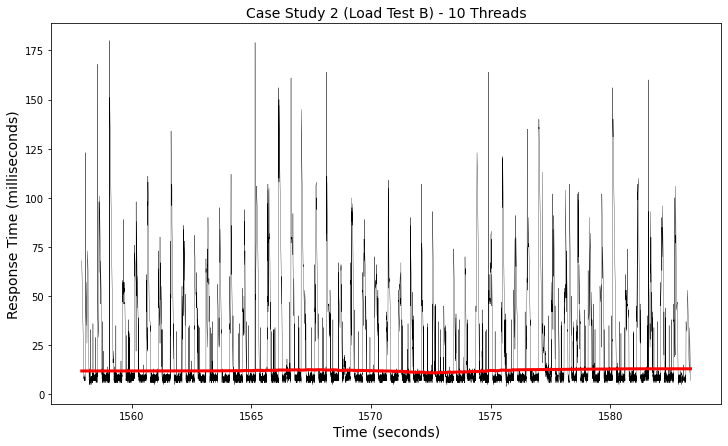

In [18]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 10
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 2 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs02-ltb-1.png", bbox_inches="tight", dpi=120)
plt.show()

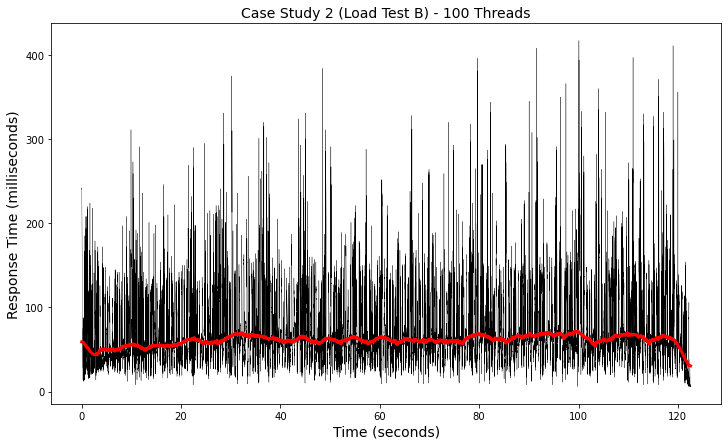

In [19]:
plt.figure(figsize=(12, 7), facecolor="white")
t = 100
x = dfb[dfb["Threads"] == t]["timeStamp"]
y = dfb[dfb["Threads"] == t]["elapsed"]
plt.plot(x, y, color="black", lw=0.3)
plt.plot(x, savgol_filter(y, 10000, 2), color="red", lw=3)
plt.title(f"Case Study 2 (Load Test B) - {t} Threads", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=14)
plt.ylabel("Response Time (milliseconds)", fontsize=14)
plt.savefig(f"{base_img_path}cs02-ltb-2.png", bbox_inches="tight", dpi=120)
plt.show()

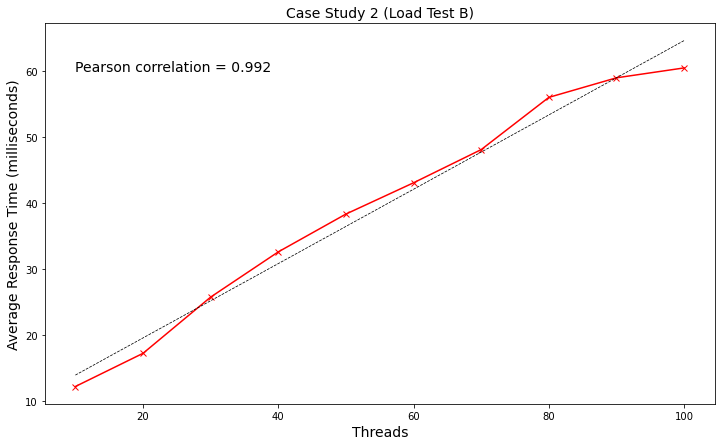

In [20]:
plt.figure(figsize=(12, 7), facecolor="white")
x = dfb_by_threads.index
y = dfb_by_threads["elapsed"]
plt.plot(x, y, color="red", marker="x")
plt.title("Case Study 2 (Load Test B)", fontsize=14)
plt.xlabel("Threads", fontsize=14)
plt.ylabel("Average Response Time (milliseconds)", fontsize=14)

# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="black", ls="--", lw=0.75)
plt.text(10, 60, f"Pearson correlation = {round(np.corrcoef(x, y)[0][1], 3)}", fontsize=14)
plt.savefig(f"{base_img_path}cs02-ltb-4.png", bbox_inches="tight", dpi=120)

plt.show()